<a href="https://colab.research.google.com/github/FranciscoMedellin/MNA_NLP/blob/main/5.2_Actividad/mna_nlp_semana_5_actividad_embeddings_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos de OpenAI**

#### **Nombres y matrículas de los integrantes del equipo:**



*   Elemento de lista
*   Elemento de lista



In [2]:
!pip install openai

In [3]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import os
from google.colab import userdata
from openai import OpenAI
import openai

In [4]:
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [5]:
# Incluye las celdas necesarias para tu acceso a la API de OpenAI.
api_key = userdata.get("MNA_NLP_API_KEY")

if not api_key:
  raise ValueError("API key no encontrada en los secretos")


In [ ]:
modelo = "gpt-4o-mini"

client = OpenAI(api_key = api_key)

"""
response = client.responses.create(
    model=modelo,
    input="Relata una historia de fantasmas en Transilvania."
)
print(response.output_text)
"""

# **Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [6]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Enlaces RAW desde GitHub (reemplázalos con los tuyos)
url_amazon = "https://raw.githubusercontent.com/FranciscoMedellin/MNA_NLP/refs/heads/main/5.2_Actividad/amazon5.txt"
url_imdb = "https://raw.githubusercontent.com/FranciscoMedellin/MNA_NLP/refs/heads/main/5.2_Actividad/imdb5.txt"
url_yelp = "https://github.com/FranciscoMedellin/MNA_NLP/blob/main/5.2_Actividad/yelp5.txt"

# Cargar los tres archivos
df_amazon = pd.read_csv(url_amazon, sep='\t', names=["texto", "etiqueta"])
df_imdb = pd.read_csv(url_imdb, sep='\t', names=["texto", "etiqueta"])
df_yelp = pd.read_csv(url_yelp, sep='\t', names=["texto", "etiqueta"])

# Unir todos los DataFrames en uno solo
df = pd.concat([df_amazon, df_imdb, df_yelp], ignore_index=True)

# *********** Aquí termina la sección de agregar código *************


In [7]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   texto     3467 non-null   object 
 1   etiqueta  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 54.3+ KB


In [8]:
# Y veamos sus primeros registros:

df.head()

,texto,etiqueta
0,So there is no way for me to plug it in here i...,0.0
1,"Good case, Excellent value.",1.0
2,Great for the jawbone.,1.0
3,Tied to charger for conversations lasting more...,0.0
4,The mic is great.,1.0


# **Pregunta - 2:**

Realiza el proceso de limpieza. Aplica el preprocesamiento que consideres adecuado.











In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Descargamos recursos: punkt -> para dividir texto en enunciados y stopwords -> para tener accesso a stopwords en varios idiomas
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


# Definir stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función de limpieza
def clean_text(text):
    text = text.lower()  # minúsculas
    text = re.sub(r'[^a-z\s]', '', text)  # eliminar puntuación y números
    tokens = word_tokenize(text)  # tokenizar
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

# Aplicamos limpieza a todos los comentarios
Xclean = df['texto'].apply(clean_text)

# Asignamos las etiquetas
Y = df['etiqueta']

# *********** Aquí termina la sección de agregar código *************

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', 'minutesmajor', 'problems']
['mic', 'great']


# **Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [21]:

# ************* Inicia la sección de agregar código:*****************************

from sklearn.model_selection import train_test_split

# Paso 1: dividir 70% entrenamiento, 30% validación+test
x_train, x_temp, y_train, y_temp = train_test_split(
    Xclean, Y, train_size=0.70, random_state=42, shuffle=True
)

# Paso 2: dividir 30% restante en 15% validación y 15% test
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=17, shuffle=True
)

# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2426 2426
X,y Val: 520 520
X,y Test 521 521


# **Pregunta - 4:**



Construye tu vocabulario a continuación


In [27]:
from collections import Counter
import matplotlib.pyplot as plt

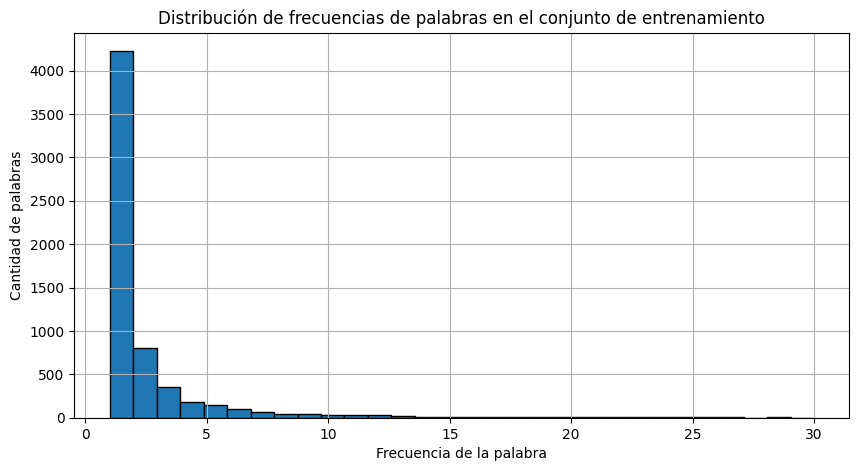

In [28]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Objeto para el conteo de frecuencia con el conjunto de entrenamiento
vocab_counter = Counter()

for tokens in x_train:
    vocab_counter.update(tokens)

# Extraer solo las frecuencias del vocabulario
frecuencias = list(vocab_counter.values())
# vocab_counter.most_common()

# Histograma
plt.figure(figsize=(10,5))
plt.hist(frecuencias, bins=30, range=(1, 30), edgecolor='black')
plt.title('Distribución de frecuencias de palabras en el conjunto de entrenamiento')
plt.xlabel('Frecuencia de la palabra')
plt.ylabel('Cantidad de palabras')
plt.grid(True)
plt.show()

# *********** Aquí termina la sección de agregar código *************

In [29]:
# Basado en la distribucion de las palabras definimos un umbral mínimo de frecuencia para eliminar ruido
min_freq = 3

# Generar vocabulario filtrado por frecuencia mínima
vocabulario = {word for word, freq in vocab_counter.items() if freq >= min_freq}

In [30]:
# b.	Indica el tamaño del vocabulario generado.


# ******* Inicia la sección de agregar código: ***********

print('Longitud del vocabulario generado:', len(vocabulario))

# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado: 1247


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++


La principal razon por la que vocabulario debe generarse exclusivamente a partir del conjunto de entrenamiento para evitar un problema conocido como fuga de datos **(data leakage)**. <br>

Si incluyeramos los datos de validación o prueba al construir el vocabulario, se estaría introduciendo conocimiento del modelo sobre ejemplos que deben permanecer desconocidos hasta la etapa de evaluación.

O sea, si este problema de fuga de datos no es evitado se compromete la integridad de la evaluación, ya que el modelo habría sido “influenciado” indirectamente por datos que no ha visto durante el entrenamiento formal.

Al generar un vocabulario solo con datos de entrenamiento nos garantiza que los procesos de validación y prueba nos reflejen el rendimiento real del modelo sobre datos nuevos, simulando asi condiciones reales de un modelo desplegado en produccion, donde debemos de generalizar a partir de vocabulario aprendido  durante el training para ser eficiente con textos sin conocer futuros.


### ++++++++ Termina la sección de agregar texto: +++++++++++


In [31]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Filtrar cada conjunto de datos para conservar solo palabras del vocabulario
train_x = [[word for word in comentario if word in vocabulario] for comentario in x_train]
val_x   = [[word for word in comentario if word in vocabulario] for comentario in x_val]
test_x  = [[word for word in comentario if word in vocabulario] for comentario in x_test]


# *********** Aquí termina la sección de agregar código *************


In [32]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['div', 'classheadermenucolumn']
['couldnt', 'take', 'seriously']
['meta']
['cinema', 'good', 'house', 'good', 'plenty']
['li']


# **Pregunta - 5:**


#### **Incluye aquí un resumen de las características y diferencias que tiene al menos los tres modelos de OpenAI indicados: "text-embedding-3-small", "text-embedding-3-large" y "text-embedding-ada-002".**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++


# **Pregunta - 6:**


#### **Diccionario clave-valor de palabras del diccionario y vectores embebidos.**

In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 7:**



Generamos los vectores embebidos a partir de los conjuntos de entrenamiento, validación y prueba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

# **Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [ ]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************


In [ ]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 9:**



Reporte del mejor modelo con el conjunto de Prueba (Test).


In [ ]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


None


# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 10:**

In [ ]:
# Incluye todas las líneas de código y celdas que consideres adecuadas para este ejercicio.


None




# **Pregunta - 11:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++

# **Fin de la Actividad de Vectores Embebidos - OpenAI**